
# Data Analysis based on Netflix Dataset

### Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
# Load the data
data = pd.read_csv('data/netflix_titles.csv')
data.head()

## Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [18]:
#data['listed_in'] = data['listed_in'].apply(lambda x: x.split(', '))

# Explode the list into separate rows
data_exploded = data.explode('listed_in')

data_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV,A talented batch of amateur bakers face off in...


## Processing Text on each Description of each Movie


- Action
- Comedy
- Drama
- Fantasy
- Horror
- Mystery
- Romance
- Thriller
- Western

In [19]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Assuming `data` is a pandas DataFrame
mined_data = {'title': [], 'Tokens': [], 'listed_in': [], 'country': [], 'type': [], 'rating': []}

# Iterating over the DataFrame
for index, row in data_exploded.iterrows():
    # Tokenize the description
    words = tokenize_text(row['description'])
    
    # lowercase 
    words = [word.lower() for word in words]
    
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # remove punctuation
    import re
    words = [re.sub(r'\W+', '', word) for word in words if word.isalpha()]
    
    # lemmentize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # one, two, three, four, five, six, seven, eight, nine, ten removed
    words = [word for word in words if word not in ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']]
    
    # modal verbs removed
    words = [word for word in words if word not in ['can', 'could', 'may', 'might', 'must', 'will', 'would', 'shall', 'should', 'take', 'find','help', 'get']]
    
    # Update the 'data' dataframe with the tokenized description
    mined_data['title'].append(row['title'])
    mined_data['Tokens'].append(words)
    mined_data['listed_in'].append(row['listed_in'])
    mined_data['country'].append(row['country'])
    mined_data['type'].append(row['type'])
    mined_data['rating'].append(row['rating'])
    

# Create a new DataFrame with the tokenized description
df = pd.DataFrame(mined_data)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahshid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mahshid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mahshid/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,Tokens,listed_in,country,type,rating
0,Sankofa,"[photo, shoot, ghana, american, model, slip, b...",Dramas,"United States, Ghana, Burkina Faso, United Kin...",Movie,TV-MA
1,Sankofa,"[photo, shoot, ghana, american, model, slip, b...",Independent Movies,"United States, Ghana, Burkina Faso, United Kin...",Movie,TV-MA
2,Sankofa,"[photo, shoot, ghana, american, model, slip, b...",International Movies,"United States, Ghana, Burkina Faso, United Kin...",Movie,TV-MA
3,The Great British Baking Show,"[talented, batch, amateur, baker, face, compet...",British TV Shows,United Kingdom,TV Show,TV-14
4,The Great British Baking Show,"[talented, batch, amateur, baker, face, compet...",Reality TV,United Kingdom,TV Show,TV-14


### df should be used for further analysis and visualization
### data_exploded should be used for prediction

In [37]:
# Drop 'International Movies' and 'International TV Shows' as they are not specific genre
df = df[df['listed_in'] != 'International Movies']
df = df[df['listed_in'] != 'International TV Shows']
df  = df[df['listed_in'] != 'Independent Movies']


In [38]:
# add 'TV Dramas' to 'Dramas'
df['listed_in'] = df['listed_in'].replace({'TV Dramas': 'Dramas',
                                           'Action & Adventure': 'Action',
                                           'Romantic Movies': 'Romantics',
                                           'Children & Family Movies': 'Family',
                                           'Classic Movies': 'Classic',
                                           'Horror Movies': 'Horror',
                                           'Music & Musicals': 'Musical',
                                           'Sci-Fi & Fantasy': 'Fantasy',
                                           'Sports Movies': 'Sports',
                                           'LGBTQ Movies': 'LGBTQ',
                                           'Cult Movies': 'Classic',
                                           'Faith & Spirituality': 'Faith',
                                           'Anime Features': 'Anime',
                                           'TV Comedies': 'Comedies',
                                           'TV Mysteries': 'Mystery',
                                           'TV Sci-Fi & Fantasy': 'Fantasy',
                                           'TV Thrillers': 'Thrillers',
                                           'TV Horror': 'Horror',
                                           'TV Action & Adventure': 'Action',
                                           'Reality TV': 'Reality',
                                           'Teen TV Shows': 'Teen',
                                           'Classic & Cult TV': 'Classic',
                                           'Science & Nature TV': 'Science',
                                           'Crime TV Shows': 'Crime',
                                           'Romantic TV Shows': 'Romantics',
                                           'British TV Shows': 'British',
                                           'Korean TV Shows': 'Korean',
                                           'Spanish-Language TV Shows': 'Spanish',
                                           "Kids' TV": 'Family',
                                           'Stand-Up Comedy & Talk Shows': 'Stand-Up Comedy',
                                           'Anime Series': 'Anime',
                                           'Science': 'Docuseries',
                                           })


In [40]:
df["listed_in"].value_counts()

listed_in
Dramas             2345
Comedies           1583
Action              819
Romantics           600
Thrillers           550
Family              516
Documentaries       391
Horror              343
Stand-Up Comedy     305
Musical             292
Fantasy             240
Classic             180
Sports              156
LGBTQ                80
Anime                71
Faith                58
Crime                38
British              21
Movies               20
Docuseries           14
Spanish              10
Korean               10
Mystery               8
TV Shows              5
Reality               3
Teen                  3
Science               1
Name: count, dtype: int64

### Word Frequency

In [41]:
# frequency of words in each genre
def word_genre_freq(dataframe):
    genre_word_frequency = {}
    for index, row in dataframe.iterrows():
        genre = row['listed_in']
        tokens = row['Tokens']
        if genre not in genre_word_frequency:
            genre_word_frequency[genre] = Counter()
        genre_word_frequency[genre].update(tokens)    
    return genre_word_frequency

In [42]:
genre_word_freq = word_genre_freq(df)

In [45]:
genre_word_freq["Action"].most_common(10)

[('young', 71),
 ('man', 63),
 ('life', 60),
 ('agent', 55),
 ('team', 53),
 ('mission', 48),
 ('cop', 48),
 ('group', 45),
 ('new', 44),
 ('world', 43)]

### Word Cloud Visualization

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# with the top 20 words in each genre

def plot_word_cloud(genre_word_freq, genres=None):  
    for genre, freq in genre_word_freq.items():
        if genre == genres:
            freq = dict(freq.most_common(20))
            wordcloud = WordCloud(width = 800, height = 800, 
                            background_color ='white', 
                            stopwords = set(stopwords.words('english'), ),
                            min_font_size = 10).generate_from_frequencies(freq)
    
            plt.figure(figsize = (8, 8), facecolor = None) 
            plt.imshow(wordcloud) 
            plt.axis("off") 
            plt.tight_layout(pad = 0) 
            plt.title(genre)
            plt.show()

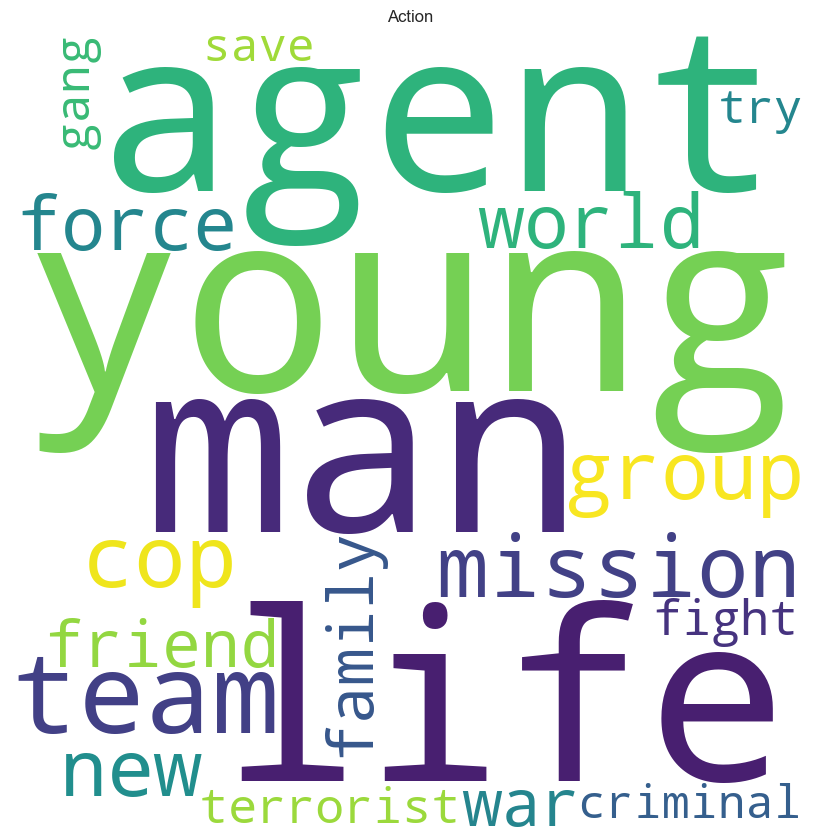

In [74]:
plot_word_cloud(genre_word_freq, genres='Action')

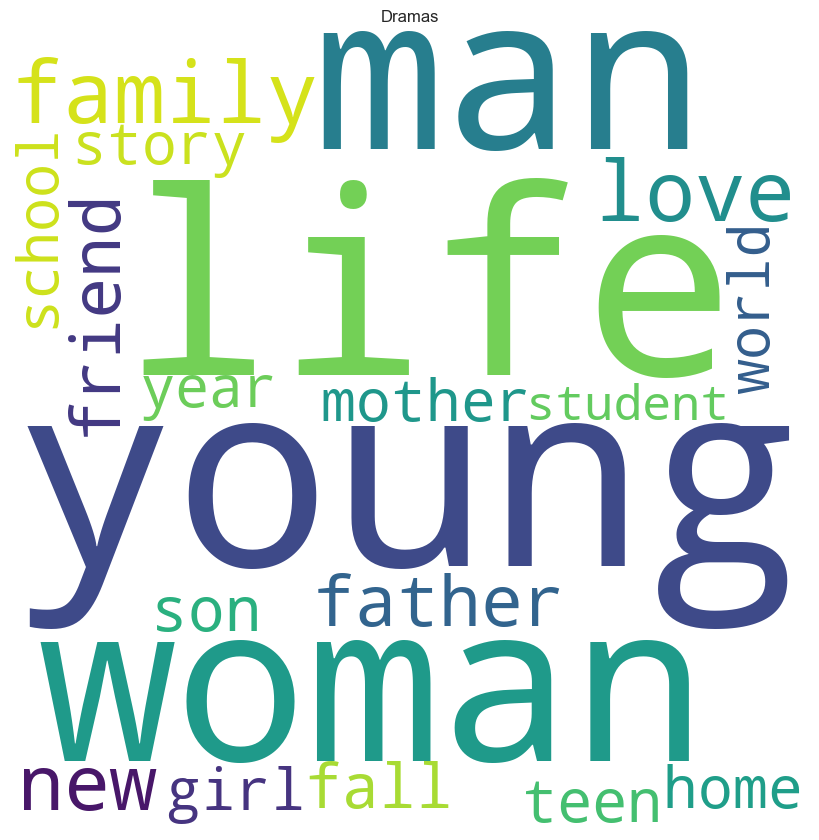

In [75]:
plot_word_cloud(genre_word_freq, genres='Dramas')

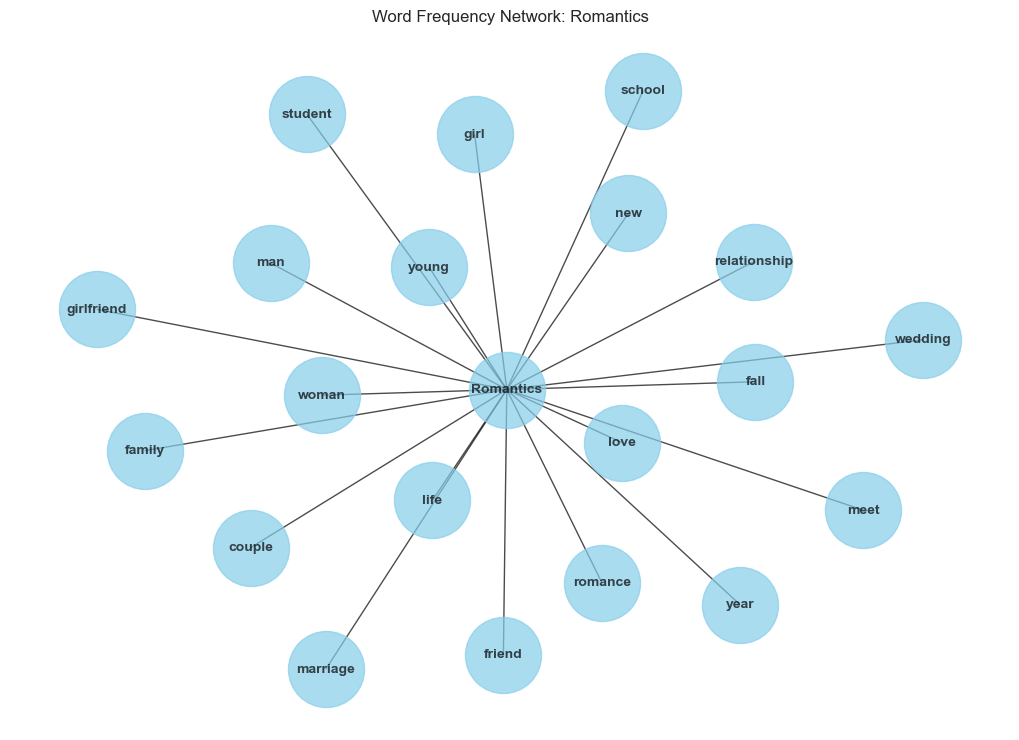

In [110]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
def create_network_graph(genre_word_freq, genres=None):
    G = nx.Graph()
    for genre, freq in genre_word_freq.items():
        if genre == genres:
            freq = dict(freq.most_common(20))
            if genre not in G:
                G.add_node(genre)
                for word, count in freq.items():
                    if word not in G:
                        G.add_node(word)
                    G.add_edge(genre, word, weight=count)
                    
    return G
genre = 'Romantics'
g = create_network_graph(genre_word_freq, genres=genre)

pos_centered = nx.spring_layout(g, seed=42)
plt.figure(figsize=(10, 7))
nx.draw(g, pos_centered, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black', width=1, alpha=0.7)
plt.title(f"Word Frequency Network: " + genre)
plt.show()
                    

### Shared Term 

In [48]:
# Visualize the shared most frequent words between genres
def shared_terms(genre_word_freq):
    shared_terms = {}
    for genre, freq in genre_word_freq.items():
        shared_terms[genre] = {}
        for genre2, freq2 in genre_word_freq.items():
            if genre != genre2:
                shared_terms[genre][genre2] = set(freq).intersection(set(freq2))
    return shared_terms

In [55]:
shared_term = shared_terms(genre_word_freq)

In [56]:
shared_term['Action']['Dramas']

{'bank',
 'discover',
 'racer',
 'tracking',
 'tv',
 'grand',
 'loved',
 'complicate',
 'willing',
 'dance',
 'come',
 'kill',
 'hundred',
 'inmate',
 'experiment',
 'connection',
 'style',
 'romance',
 'carter',
 'guest',
 'much',
 'blame',
 'peaceful',
 'incredible',
 'path',
 'operative',
 'assignment',
 'enforcer',
 'sadistic',
 'tow',
 'antique',
 'wildlife',
 'israel',
 'reunited',
 'warehouse',
 'city',
 'entertains',
 'suicidal',
 'bird',
 'vault',
 'mumbai',
 'place',
 'ravaged',
 'track',
 'saint',
 'organization',
 'colombian',
 'sam',
 'die',
 'money',
 'made',
 'foreign',
 'personal',
 'showdown',
 'hinders',
 'bullet',
 'artist',
 'practice',
 'analyst',
 'us',
 'commissioner',
 'village',
 'opposition',
 'coast',
 'dystopian',
 'crossfire',
 'shocking',
 'sarah',
 'rock',
 'charles',
 'catastrophic',
 'tricky',
 'accident',
 'allied',
 'strives',
 'honorable',
 'tapped',
 'volatile',
 'revealed',
 'pampered',
 'market',
 'bloodthirsty',
 'usher',
 'musical',
 'asia',
 'e

In [4]:
%pip install pyvis networkx nltk
print("Libraries installed successfully.")

  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
   ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
   ---------------------------------------- 756.0/756.0 kB 6.3 MB/s eta 0:00:00
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Note: you may need to restart the kernel to use updated packages.
Libraries installed successfully.


# Find three most used word for each  genre

In [6]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Load the dataset
df = pd.read_csv('data/netflix_titles_preprocessed.csv')

# Convert the 'Tokens' column from string representation of list to actual list
df['Tokens'] = df['Tokens'].apply(eval)

# Function to get top words for a genre
def get_top_words(genre, n=3):
    genre_tokens = [token for tokens in df[df['listed_in'].str.contains(genre)]['Tokens'] for token in tokens]
    word_counts = Counter(genre_tokens)
    return [word for word, _ in word_counts.most_common(n) if word.lower() not in stop_words and len(word) > 2]

# Get unique genres
genres = df['listed_in'].str.split(', ').explode().unique()

# Create a graph
G = nx.Graph()

# Add nodes and edges
for genre in genres:
    G.add_node(genre, color='#ff9999', size=20)  # Add genre node
    top_words = get_top_words(genre)
    for word in top_words:
        G.add_node(word, color='#99ccff', size=15)  # Add word node
        G.add_edge(genre, word)  # Add edge between genre and word

# Create a Pyvis network
net = Network(notebook=True, width="100%", height="600px", bgcolor="#ffffff", font_color="black")

# Add nodes to the Pyvis network
for node, attrs in G.nodes(data=True):
    net.add_node(node, color=attrs['color'], size=attrs['size'], title=node)

# Add edges to the Pyvis network
for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# Save the network as an HTML file
net.save_graph("shared_word_network.html")

print("Shared word network has been created and saved as 'shared_word_network.html'.")
print("\
Here are the top 3 words for each genre:")
for genre in genres:
    print(f"{genre}: {', '.join(get_top_words(genre))}")

Shared word network has been created and saved as 'shared_word_network.html'.
Here are the top 3 words for each genre:
Dramas: young, life, woman
British: series, life, best
Reality: best, talented, batch
Comedies: life, friend, new
Romantics: love, life, woman
Horror: young, home, new
Fantasy: young, alien, earth
Thrillers: young, woman, man
Action: young, man, life
Classic: life, new, war
Anime: ninja, naruto, save
Family: new, friend, save
Documentaries: documentary, life, world
Musical: love, music, documentary
Faith: life, story, family
LGBTQ: gay, life, friend
Crime: murder, life, world
Spanish: world, inspired, spain
Stand-Up Comedy: special, comedian, comic
TV Shows: collection, group, year
Movies: christmas, new, town
Sports: team, player, documentary
Mystery: mystery, romance, family
Docuseries: documentary, revealing, story
Teen: school, student, high
Korean: student, college, korea
Science: fact, meet, fiction


# Word Network

In [7]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Load the dataset
df = pd.read_csv('data/netflix_titles_preprocessed.csv')

# Convert the 'Tokens' column from string representation of list to actual list
df['Tokens'] = df['Tokens'].apply(eval)

# Function to get top words for a genre
def get_top_words(genre, n=3):
    genre_tokens = [token for tokens in df[df['listed_in'].str.contains(genre)]['Tokens'] for token in tokens]
    word_counts = Counter(genre_tokens)
    return [word for word, _ in word_counts.most_common(n) if word.lower() not in stop_words and len(word) > 2]

# Get unique genres
genres = df['listed_in'].str.split(', ').explode().unique()

# Create a graph
G = nx.Graph()

# Add nodes and edges
for genre in genres:
    G.add_node(genre, color='#ff9999', size=20)  # Add genre node
    top_words = get_top_words(genre)
    for word in top_words:
        G.add_node(word, color='#99ccff', size=15)  # Add word node
        G.add_edge(genre, word)  # Add edge between genre and word

# Create a Pyvis network
net = Network(notebook=True, width="100%", height="600px", bgcolor="#ffffff", font_color="black")

# Add nodes to the Pyvis network
for node, attrs in G.nodes(data=True):
    net.add_node(node, color=attrs['color'], size=attrs['size'], title=node)

# Add edges to the Pyvis network
for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# Save the network as an HTML file
net.save_graph("shared_word_network.html")

### Language Modeling and genre prediction

```{python}

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

data_desc = data_desc.reset_index(drop=True)

# Optionally, remove duplicate rows if necessary
data_desc = data_desc.drop_duplicates()
data_desc['combined_features'] = data_desc['description'] + ' ' + data_desc['country'].fillna('') + ' ' + data_desc['rating'].fillna('')

# Set X and y using the exploded DataFrame
X = data_desc['combined_features']
y = data_desc['listed_in']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Encode the target variable (genres)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Create a pipeline with TF-IDF and RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.8)),  # Use bigrams and trigrams
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))  # Multinomial Naive Bayes
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
'''

Accuracy: 0.22

 # Genre similarity heatmap

Genre similarity heatmap has been saved as 'genre_similarity_heatmap.png'.
Top 5 most similar genre pairs:
Anime - Anime: 1.00
LGBTQ - LGBTQ: 1.00
Dramas - Dramas: 1.00
British - British: 1.00
Thrillers - Thrillers: 1.00
Done


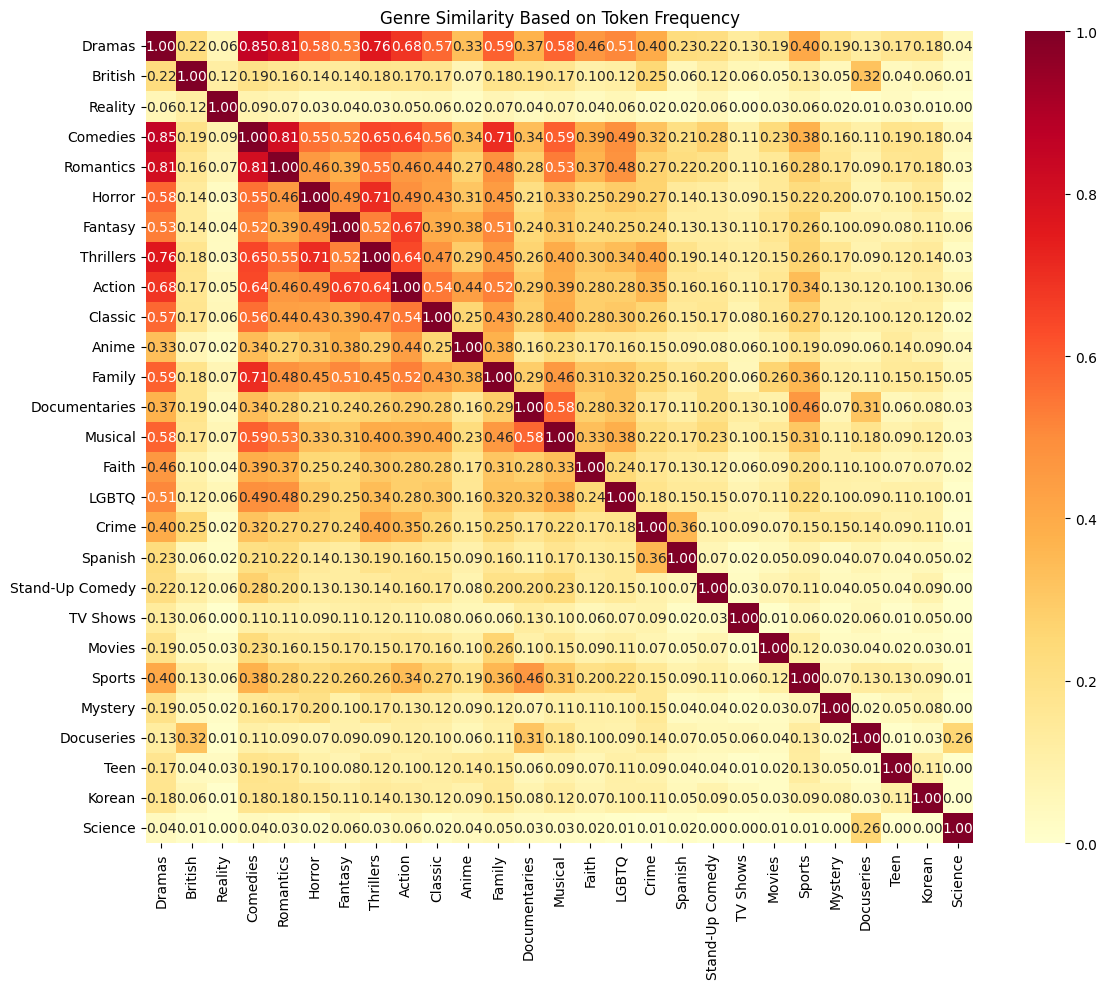

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/netflix_titles_preprocessed.csv')

# Convert the 'Tokens' column from string representation of list to actual list
df['Tokens'] = df['Tokens'].apply(eval)

# Join the tokens into a single string for each row
df['Tokens_str'] = df['Tokens'].apply(' '.join)

# Get unique genres
genres = df['listed_in'].str.split(', ').explode().unique()

# Create a dictionary to store tokens for each genre
genre_tokens = {genre: [] for genre in genres}

# Populate the dictionary
for _, row in df.iterrows():
    for genre in row['listed_in'].split(', '):
        genre_tokens[genre].extend(row['Tokens'])

# Join tokens for each genre
genre_docs = {genre: ' '.join(tokens) for genre, tokens in genre_tokens.items()}

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the genre documents
tfidf_matrix = vectorizer.fit_transform(genre_docs.values())

# Calculate cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a DataFrame for the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=genres, columns=genres)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Genre Similarity Based on Token Frequency')
plt.tight_layout()
plt.savefig('genre_similarity_heatmap.png')
plt.close()

print("Genre similarity heatmap has been saved as 'genre_similarity_heatmap.png'.")

# Display the top 5 most similar genre pairs
similarity_series = similarity_df.unstack()
similarity_series = similarity_series[similarity_series < 1.0]  # Remove self-similarities
top_5_similar = similarity_series.nlargest(5)

print("\
Top 5 most similar genre pairs:")
for (genre1, genre2), similarity in top_5_similar.items():
    print(f"{genre1} - {genre2}: {similarity:.2f}")

print("\
Done")

# Plot the heatmap again for visualization in Jupyter Notebook
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Genre Similarity Based on Token Frequency')
plt.tight_layout()
plt.show()